In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [17]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

9


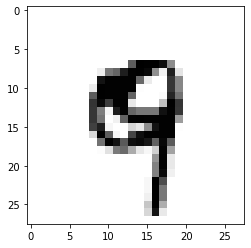

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [16]:
from tensorflow import keras
model = keras.models.load_model('mnist.h5')

In [126]:
import onnxmltools
import os

In [127]:
# Convert the Keras model into ONNX
onnx_model = onnxmltools.convert_keras(model)

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 16 -> 10
The maximum opset needed by this model is only 11.


In [128]:
# Save ONNX model
onnxmltools.utils.save_model(onnx_model, 'mnist.onnx')

In [129]:
print(os.path.getsize('mnist.h5')) # byte of old keras model.
print(os.path.getsize('mnist.onnx')) # byte of new onnx model.

3047880
1005177


In [130]:
#### inference with onnx

8


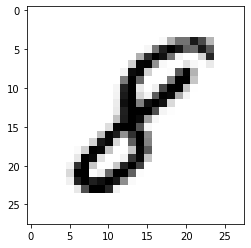

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys');

In [148]:
x=np.array(x_test[image_index]).reshape(1, 28, 28, 1)

In [149]:
import onnxruntime
sess = onnxruntime.InferenceSession("mnist.onnx")

In [150]:
x.shape

(1, 28, 28, 1)

In [153]:
cls_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

x = x if isinstance(x, list) else [x]

feed = dict([(input.name, x[n]) for n, input in enumerate(sess.get_inputs())])
pred_onnx = sess.run(None, feed)[0]

InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Unexpected input data type

In [ ]:
#squeezes the numpy matrix to numpy vector, i.e., remove the 0-th dimension, 
#so that we can get the probabilities of each class.
pred = np.squeeze(pred_onnx)

top_inds = pred.argsort()[::-1][:5]
for i in top_inds:
    print('    {:.3f}  {}'.format(pred[i], cls_list[i]))

In [132]:
#Preprocess the image
img = cv2.imread(path)
img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
img.resize((1, 1, 28, 28))

data = json.dumps({'data': img.tolist()})
data = np.array(json.loads(data)['data']).astype('float32')

NameError: name 'cv2' is not defined